# Analysis of Fandango's Rating System

This project is meant to evaluate the veracity of Fandango's movie rating system.  It was brought to attention from a recent 538 article written by Walt Hickey that Fandango may be artificially inflating their movie scores to escalate the number of purchasers.  Fandango has since claimed that they have fixed their rating system to be more faithful to their users rankings.  The goal of this project is to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

In [1]:
import pandas as pd

fandango_score_comparison = pd.read_csv('fandango_score_comparison.csv')
movie_ratings = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
fandango_score_comparison.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
movie_ratings.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
print('movie ratings shape = {0},\nfandango_score_comparison shape = {1}'.format(movie_ratings.shape, fandango_score_comparison.shape))

movie ratings shape = (214, 15),
fandango_score_comparison shape = (146, 22)


In [5]:
hickey_data = fandango_score_comparison[['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']]
movie_data = movie_ratings[['movie','year','fandango']]

# Is the Data Representative of the Entire Population?
In Hickey's data he is very deliberate with his words saying the data "contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015." While the mircealex repository is a bit more ambiguious with its selections procedure saying that the data "contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017."  It is unclear what mircealex means when he says "with a segnificant number of votes".  In addition to this ambiguious data collection precedure, Hickey appears to have more constraints for his data set including "RT User rating" and "metacritic User Score".  Another issue is that (perhaps obviously) the data for each respective set were collected at separate times.  This would mean that the latter dataset contains movies that would not be included in Hickey's data.  I do not believe that movies had an equal chance of being included in the two samples and therefore that the samples are unlikely to be representative of the population.

# Changing the Goal
The new goal of this project will be to determine whether there has been any change in Fandango's rating system after Hickey's analysis.  This will be done by investigating how (if at all) the ratings for popular movies differ between 2015 (Hickey's data) and 2016 (mircealex's data)  

# Isolating the Data

With the new goel, we now have two populationbs that we want to describe and compare with eachother:
All Fandango's ratings for popular movies released in 2015.
All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it before continuing.  We'll use HIckey's benchmark of 30 fan ratings and consider a movie as "popular only if it has 30 fan ratings or more on Fandango's website.

An easy way to do this would be to take a random sample of 10 movies and checking the number of reviews they had on Fandango's website.

In [6]:
movie_data.movie.sample(10, random_state = 1)

108                     Mechanic: Resurrection
206                                   Warcraft
106                                  Max Steel
107                              Me Before You
51     Fantastic Beasts and Where to Find Them
33                                        Cell
59                                      Genius
152                                      Sully
4                      A Hologram for the King
31                  Captain America: Civil War
Name: movie, dtype: object

Here is a list of movies and the number of reviews they recieved on Fandango's website:

Mechanic Resurrection: 2251
Warcraft: 7284
Max Steel: 495
Me Before You: 5274
Fantastic Beasts and Where to Find Them: 13505
Cell: 1754
Genius: 127
Sully: 11890
A Hologram for the King: 501
Captain America Civil War: 35184

Every movie in this random sample has a user rating number greater than 30.  All of them would be considered "popular" according to Hickey's definition.



Exploring the dataset it is apparent that some moview were not released in 2015 and 2016. I will need to isolate only the sample points that belong to our populations of interest

In [7]:
#Isolating movies released in 2015
print(hickey_data.FILM.sample(10, random_state=1))

98                                      Get Hard (2015)
66                                      The Gift (2015)
53                                   Hot Pursuit (2015)
75                                   San Andreas (2015)
121               The Stanford Prison Experiment (2015)
74     The Hobbit: The Battle of the Five Armies (2014)
119                                      Phoenix (2015)
128         Mission: Impossible â€“ Rogue Nation (2015)
44                  Kingsman: The Secret Service (2015)
58                                   Seventh Son (2015)
Name: FILM, dtype: object


In [8]:
#As seen in the random sample above, there is a single movie that was not released in 2015
#Using the stripping technique to isolate 2015 movies
#practice = hickey_data.FILM.str.rstrip('(')
practice = hickey_data.FILM.str.split('(',expand=True)
year = practice.iloc[:,1].str.strip(')').astype(int)
hickey_data.loc[:,'year'] = year

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
fan_15 = hickey_data[hickey_data['year'] == 2015]
fan_16 = movie_data[movie_data['year'] == 2016]

The data has been successfully isolated to the two relevant years for this project.fan_15 are the reviews for 2015 and fan_16 are the reviews for 2016

In [10]:
fan_15.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


([<matplotlib.axis.XTick at 0x7ff9ad27b630>,
 <a list of 11 Text xticklabel objects>)

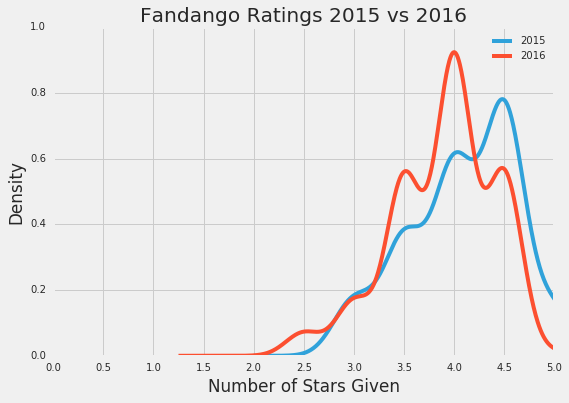

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')
fan_15.Fandango_Stars.plot.kde(label='2015', legend=True, figsize=(8,5.5))
fan_16.fandango.plot.kde(label='2016', legend=True)
plt.title('Fandango Ratings 2015 vs 2016')
plt.xlabel('Number of Stars Given')
plt.xlim(0,5)
x = arange(0,5.1,.5)
plt.xticks(x)

One important observation to make from the above plot is that they both are strongly left skewed.  This would mean that users of Fandango will generally give higher scores to movies.  It is also worth noticing that the scores of 2016 are generally slightly lower than those of 2015.  The most clear differentiation between the two plots is that 2016 has mosts of its review scores as 4.0 while 2015 has most of its review scores as 4.5.  Because of this we can say that there is evidence that there is a change between Fandango's ratings for popular movies in 2015 and 2016.

In [21]:
print('2015 Data' + '\n' + '-' * 16 )
fan_15.Fandango_Stars.value_counts(normalize=True).sort_index() * 100

2015 Data
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [22]:
print('2016 Data' + '\n' + '-' * 16 )
fan_16.fandango.value_counts(normalize=True).sort_index() * 100

2016 Data
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016 the ratings were significantly lower than 2015.  Less than 1 percent of the movies had a value of five stars. In 2016, 25% of movies were rated between 4.5 and 5.  This same interval in 2015 recieved 45% of the user ratings.  From this we can conclude there is a definite difference between the two distributions.

In [58]:
mean_15 = fan_15.Fandango_Stars.mean()
mean_16 = fan_16.fandango.mean()

mode_15 = fan_15.Fandango_Stars.mode()[0]
mode_16 = fan_16.fandango.mode()[0]

median_15 = fan_15.Fandango_Stars.median()
median_16 = fan_16.fandango.median()

In [64]:
summary = pd.DataFrame()
summary['2015'] = [mean_15, median_15, mode_15]
summary['2016'] = [mean_16, median_16, mode_16]
summary.index = ['mean','median','mode']

In [65]:
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


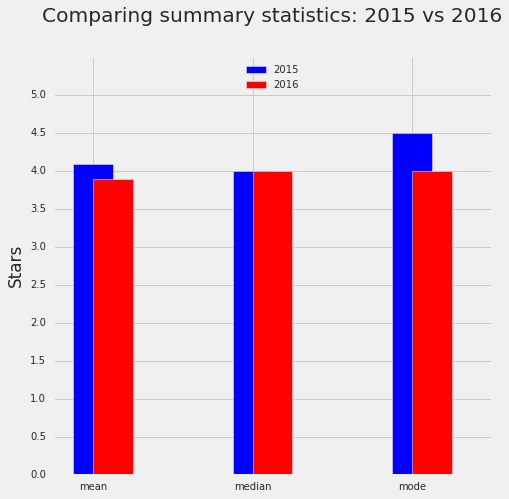

In [90]:
summary['2015'].plot.bar(color='b',label='2015',legend=True,figsize=(7,7),width=.25)
summary['2016'].plot.bar(align='edge',color='r',label='2016',legend=True,width=.25,rot=0)
plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')

In [92]:
summary['2015'] - summary['2016']

mean      0.197837
median    0.000000
mode      0.500000
dtype: float64

# Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.